# Task 1 - Data Exploration and Feature Engineering

## Task 1a.

In [ ]:
import pandas as pd
import numpy as np
path = "/content/drive/MyDrive/data.csv"
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(path)
df.convert_dtypes()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300,6,AUTOMATIC,all wheel drive,4,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
# dropping the duplicate rows in the dataset

df=df.drop_duplicates()

In [ ]:
for column in df.columns.tolist():
  print("Null values in column ",column, "are ",df[column].isnull().sum())

Null values in column  Make are  0
Null values in column  Model are  0
Null values in column  Year are  0
Null values in column  Engine Fuel Type are  3
Null values in column  Engine HP are  69
Null values in column  Engine Cylinders are  30
Null values in column  Transmission Type are  0
Null values in column  Driven_Wheels are  0
Null values in column  Number of Doors are  6
Null values in column  Market Category are  3376
Null values in column  Vehicle Size are  0
Null values in column  Vehicle Style are  0
Null values in column  highway MPG are  0
Null values in column  city mpg are  0
Null values in column  Popularity are  0
Null values in column  MSRP are  0


In [ ]:
# dropping the Market Category Column as it has many missing values and does not give meaningful insights to predict the taget variable
df.drop(columns=['Market Category'],axis=1,inplace=True)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df[df['Engine Fuel Type']=='electric'][['Engine HP','Engine Fuel Type']].head()

,Engine HP,Engine Fuel Type
539,NaN,electric
540,NaN,electric
541,NaN,electric
1680,177.0,electric
1681,177.0,electric


In [ ]:
df[df['Engine Fuel Type']=='electric'][['Engine Cylinders','Engine Fuel Type']]

,Engine Cylinders,Engine Fuel Type
539,0.0,electric
540,0.0,electric
541,0.0,electric
1680,0.0,electric
1681,0.0,electric
1682,0.0,electric
1983,NaN,electric
1984,NaN,electric
3716,NaN,electric
3717,NaN,electric


In [ ]:
# Filling the value of Engine HP with '0' as the all have the Engine Fuel Type of Electric.
df['Engine HP']=df['Engine HP'].fillna(0)

# Filling the NaN values with '0' in the Engine Cylinder column as all have the Fuel Type of Electric
df['Engine Cylinders']=df['Engine Cylinders'].fillna(0)

#Filling the Engine Fuel Type with the mode of the column
df['Engine Fuel Type']=df['Engine Fuel Type'].fillna('regular unleaded')

# Filling the Number of Doors with the mean of the column
df['Number of Doors']=df['Number of Doors'].fillna(df['Number of Doors'].mean())

In [ ]:
# let us see that we have successfully filled the null values in the columns with the help of the below code

for column in df.columns.tolist():
  print("Null values in column ",column, "are ",df[column].isnull().sum())

Null values in column  Make are  0
Null values in column  Model are  0
Null values in column  Year are  0
Null values in column  Engine Fuel Type are  0
Null values in column  Engine HP are  0
Null values in column  Engine Cylinders are  0
Null values in column  Transmission Type are  0
Null values in column  Driven_Wheels are  0
Null values in column  Number of Doors are  0
Null values in column  Vehicle Size are  0
Null values in column  Vehicle Style are  0
Null values in column  highway MPG are  0
Null values in column  city mpg are  0
Null values in column  Popularity are  0
Null values in column  MSRP are  0


In [ ]:
# removing the rows which have the values of 'UNKNOWN' for the Transmission Type

df.drop(df[df['Transmission Type']=='UNKNOWN'].index, axis='index',inplace=True)

In [ ]:
continuous_columns=df.describe(include=['number']).round(2).columns

In [ ]:
# Finding the number of outliers in the dataset
for column in continuous_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3-Q1
  print(f"IQR for the column {column} is= {Q3} - {Q1} = {IQR}")

IQR for the column Year is= 2016.0 - 2007.0 = 9.0
IQR for the column Engine HP is= 303.0 - 170.0 = 133.0
IQR for the column Engine Cylinders is= 6.0 - 4.0 = 2.0
IQR for the column Number of Doors is= 4.0 - 2.0 = 2.0
IQR for the column highway MPG is= 30.0 - 22.0 = 8.0
IQR for the column city mpg is= 22.0 - 16.0 = 6.0
IQR for the column Popularity is= 2009.0 - 549.0 = 1460.0
IQR for the column MSRP is= 43050.0 - 21622.5 = 21427.5


In [ ]:
# the columns that we think we should remove the outliers are highway MPG, city MPG, MSRP, Engine HP and Cylinders

outlier_columns=['highway MPG','city mpg','MSRP','Engine HP','Engine Cylinders']

In [ ]:
for i in outlier_columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)

  IQR = Q3-Q1
  outliers_df=[]
  outliers_df = df[(df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))]
  print(f"Num of outliers for the column {i}: ", len(outliers_df))
  df.drop(outliers_df.index, axis='index',inplace=True)



Num of outliers for the column highway MPG:  182
Num of outliers for the column city mpg:  130
Num of outliers for the column MSRP:  929
Num of outliers for the column Engine HP:  50
Num of outliers for the column Engine Cylinders:  29


### Plotting for understanding the relationships



In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Make")
fig.show()

In [ ]:
fig = px.scatter(df, x="Make")
fig.show()
fig = px.violin(df, x="Make")
fig.show()

In [ ]:
fig = px.violin(df, x="Model")
fig.show()
fig = px.histogram(df, x="Model")
fig.show()

In [ ]:
fig = px.violin(df, x="highway MPG",  color_discrete_sequence=['indianred'])
fig.show()
fig = px.histogram(df, x="Make", color ="highway MPG")
fig.show()

In [ ]:
fig = px.violin(df, x="city mpg",  color_discrete_sequence=['blue'])
fig.show()
fig = px.histogram(df, x="city mpg", color="Make")
fig.show()

In [ ]:
fig = px.histogram(df, x="MSRP", color="Make")
fig.show()
fig = px.violin(df, x="MSRP")
fig.show()


## Task 1b



In [ ]:
import pandas as pd
import numpy as np
path = "/content/drive/MyDrive/data.csv"
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv(path)
df.convert_dtypes()

df=df.drop_duplicates()

# dropping the Market Category Column as it has many missing values and does not give meaningful insights to predict the taget variable
df.drop(columns=['Market Category'],axis=1,inplace=True)

# Filling the value of Engine HP with '0' as the all have the Engine Fuel Type of Electric.
df['Engine HP']=df['Engine HP'].fillna(0)

# Filling the NaN values with '0' in the Engine Cylinder column as all have the Fuel Type of Electric
df['Engine Cylinders']=df['Engine Cylinders'].fillna(0)

#Filling the Engine Fuel Type with the mode of the column
df['Engine Fuel Type']=df['Engine Fuel Type'].fillna('regular unleaded')

# Filling the Number of Doors with the mean of the column
df['Number of Doors']=df['Number of Doors'].fillna(df['Number of Doors'].mean())


# removing the rows which have the values of 'UNKNOWN' for the Transmission Type

df.drop(df[df['Transmission Type']=='UNKNOWN'].index, axis='index',inplace=True)

continuous_columns=df.describe(include=['number']).round(2).columns

# Finding the number of outliers in the dataset
for column in continuous_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3-Q1


# the columns that we think we should remove the outliers are highway MPG, city MPG, MSRP, Engine HP and Cylinders

outlier_columns=['highway MPG','city mpg','MSRP','Engine HP','Engine Cylinders']


for i in outlier_columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)

  IQR = Q3-Q1
  outliers_df=[]
  outliers_df = df[(df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))]
  print(f"Num of outliers for the column {i}: ", len(outliers_df))
  df.drop(outliers_df.index, axis='index',inplace=True)



# New bins and labels
bins = [1000 ,5000, 20000, 35000, 50000, 80000]
labels = ['Cheap Cars','Economy Cars', 'Mid-Range Cars', 'Upper Mid-Range Cars', 'Luxury Cars']
df['MSRP_Category'] = pd.cut(df['MSRP'], bins=bins, labels=labels)



Mounted at /content/drive
Num of outliers for the column highway MPG:  182
Num of outliers for the column city mpg:  130
Num of outliers for the column MSRP:  929
Num of outliers for the column Engine HP:  50
Num of outliers for the column Engine Cylinders:  29


In [ ]:
df.describe(exclude=['number'])

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,MSRP_Category
count,9867,9867,9867,9867,9867,9867,9867,9867
unique,38,750,9,3,4,3,16,5
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Compact,Sedan,Mid-Range Cars
freq,1045,156,6406,7168,4074,3846,2475,4199


In [ ]:
# Converting the entire dataset to one hot encoded dataset except the target variable which would be done label encoding

columns=df.describe(exclude=['number']).columns



encode_columns=['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']

new_df=pd.get_dummies(df[encode_columns],dtype=int)

In [ ]:
existing_columns_to_drop = [col for col in encode_columns if col in df.columns]


In [ ]:
existing_columns_to_drop

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Vehicle Size',
 'Vehicle Style']

In [ ]:
df_final = pd.concat([df.drop(columns=existing_columns_to_drop), new_df], axis=1)

In [ ]:
df_final.shape

(9867, 832)

The dataset after converting all the categorical columns into numerical format, has many columns. The total number of columns are 832. Using to train such a dataset ould be extremely difficult as it would be computationaly very expensive. Also, this datsaset has couple of columns that have ordinal values where label encoding could have been used to improve the quality of the dataset while decreasing the features after performing the one hot encoding.


Features like Model, where there are a lot of unique values, can undergo Target Encoding where we can replace the feature values by their mean of the MSRP_Category which is our target variable.

Label Encdoing can be done where the values are in a order like small, medium,  high etc. It does not make any sense to perform any kind of One hot encoding in such features.

In the context of this dataset, as this dataset does not have features with ordinal values, One Hot Encoding is a better option. But at the same time, performing one got encoding on those features causes the complexity of the model to increase also making the model computationally expenseive to train.

## Task 2a


**Derivation of Entropy**

Entropy measures the uncertainty or impurity in a dataset and is given by the formula:

$$H(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)$$

where:

  $$ S $$ is the dataset.
  $$ c $$ is the number of distinct classes in $$S$$.
  $$p_i$$ is the probability of an element belonging to class i.
  \item The logarithm is base 2, reflecting the binary nature of information encoding.


The entropy is maximized when all classes are equally probable, i.e.,  $$p_i = \frac{1}{c} $$ for all $$ i $$, and it is minimized (zero) when all elements belong to one class (no uncertainty).




In [ ]:
# Preparing the dataset for performing Decision Tree Classifier

In [ ]:
df.to_csv('dt.csv')

In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP_Category
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,Upper Mid-Range Cars
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,Upper Mid-Range Cars
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,Upper Mid-Range Cars
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,Mid-Range Cars
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,Mid-Range Cars


In [ ]:
# New bins and labels
bins = [1000 ,5000, 20000, 35000, 50000, 80000]
labels = ['Cheap Cars','Economy Cars', 'Mid-Range Cars', 'Upper Mid-Range Cars', 'Luxury Cars']
df['MSRP_Category'] = pd.cut(df['MSRP'], bins=bins, labels=labels)

In [ ]:
df.drop(columns=['MSRP'],inplace=True)

In [ ]:
# Calculating the entropy for MSRP_Category in the dataset

probabilities = df['MSRP_Category'].value_counts(normalize=True)

# Compute the entropy using the formula: -sum(p * log2(p))
entropy = -np.sum(probabilities * np.log2(probabilities))
print(entropy)

2.049331081088529


## Task 2b

In [ ]:
# Function to calculate entropy
def entropy(probs):
    return -sum([p * np.log2(p) for p in probs if p != 0])

# Calculate the entropy of the entire dataset
def entropy_of_dataset(df, class_col):
    class_counts = df[class_col].value_counts()
    probs = class_counts / len(df)
    return entropy(probs)

# Calculate the entropy after splitting by a feature
def entropy_after_split(df, feature_col, class_col):
    values = df[feature_col].unique()
    subset_entropy = 0
    for value in values:
        subset = df[df[feature_col] == value]
        prob = len(subset) / len(df)
        subset_entropy += prob * entropy_of_dataset(subset, class_col)
    return subset_entropy

# Information gain calculation
def information_gain(df, feature_col, class_col):
    total_entropy = entropy_of_dataset(df, class_col)
    split_entropy = entropy_after_split(df, feature_col, class_col)
    return total_entropy - split_entropy

# Features to calculate information gain for
features = ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Transmission Type']
results = {}

for feature in features:
    info_gain = information_gain(df, feature, 'MSRP_Category')
    results[feature] = info_gain

print("The information gain for the five specific features are:")
results


The information gain for the five specific features are:


{'Make': 0.41837817717416304,
 'Model': 1.544372603541713,
 'Year': 0.6226567909313188,
 'Engine Fuel Type': 0.210665253860431,
 'Transmission Type': 0.15254825261848914}

## Task 2c

In [ ]:
def intrinsic_value(df, feature_col):
    values = df[feature_col].unique()
    iv = 0
    for value in values:
        prob = len(df[df[feature_col] == value]) / len(df)
        iv += prob * np.log2(prob)
    return -iv

# Information Gain Ratio calculation
def information_gain_ratio(df, feature_col, class_col):
    ig = information_gain(df, feature_col, class_col)
    iv = intrinsic_value(df, feature_col)
    if iv == 0:
        return 0  # To handle the case where intrinsic value is zero
    return ig / iv

# Features to calculate information gain ratio for
features = ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Transmission Type']
results = {}

for feature in features:
    igr = information_gain_ratio(df, feature, 'MSRP_Category')
    results[feature] = igr

results

{'Make': 0.08861897950330795,
 'Model': 0.17259326044637524,
 'Year': 0.15319837304143852,
 'Engine Fuel Type': 0.13703163751180023,
 'Transmission Type': 0.15439022754702716}

## Task 2d

The top three features that are chosen are Make, Model and Year. Below is the Information Gain for the top three features in the dataset.

Make: 0.41837817717416304,
Model: 1.544372603541713,
Year: 0.6226567909313188

The highest information gain is of Model then Year which is followed by Make.



## Task 3a

In [ ]:
import pandas as pd
import numpy as np
path = "/content/drive/MyDrive/data.csv"
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv(path)
df.convert_dtypes()

df=df.drop_duplicates()

# dropping the Market Category Column as it has many missing values and does not give meaningful insights to predict the taget variable
df.drop(columns=['Market Category'],axis=1,inplace=True)

# Filling the value of Engine HP with '0' as the all have the Engine Fuel Type of Electric.
df['Engine HP']=df['Engine HP'].fillna(0)

# Filling the NaN values with '0' in the Engine Cylinder column as all have the Fuel Type of Electric
df['Engine Cylinders']=df['Engine Cylinders'].fillna(0)

#Filling the Engine Fuel Type with the mode of the column
df['Engine Fuel Type']=df['Engine Fuel Type'].fillna('regular unleaded')

# Filling the Number of Doors with the mean of the column
df['Number of Doors']=df['Number of Doors'].fillna(df['Number of Doors'].mean())


# removing the rows which have the values of 'UNKNOWN' for the Transmission Type

df.drop(df[df['Transmission Type']=='UNKNOWN'].index, axis='index',inplace=True)

continuous_columns=df.describe(include=['number']).round(2).columns

# Finding the number of outliers in the dataset
for column in continuous_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3-Q1


# the columns that we think we should remove the outliers are highway MPG, city MPG, MSRP, Engine HP and Cylinders

outlier_columns=['highway MPG','city mpg','MSRP','Engine HP','Engine Cylinders']


for i in outlier_columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)

  IQR = Q3-Q1
  outliers_df=[]
  outliers_df = df[(df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))]
  print(f"Num of outliers for the column {i}: ", len(outliers_df))
  df.drop(outliers_df.index, axis='index',inplace=True)



# New bins and labels
bins = [1000 ,5000, 20000, 35000, 50000, 80000]
labels = ['Cheap Cars','Economy Cars', 'Mid-Range Cars', 'Upper Mid-Range Cars', 'Luxury Cars']
df['MSRP_Category'] = pd.cut(df['MSRP'], bins=bins, labels=labels)

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP_Category
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,Upper Mid-Range Cars
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,Upper Mid-Range Cars
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,Upper Mid-Range Cars
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,Mid-Range Cars
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,Mid-Range Cars


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
columns_to_encode = ['Make', 'Model','MSRP_Category']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Applying LabelEncoder to each column
for column in columns_to_encode:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

df.drop(columns=['Make','Model','MSRP_Category'],axis=1,inplace=True)

In [ ]:
selected_columns = ['Year','Make_encoded','Model_encoded','MSRP_Category_encoded']
final_df=df[selected_columns]


In [ ]:
from sklearn.model_selection import train_test_split

X=final_df.iloc[:,:-1]
y=df['MSRP_Category_encoded']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Creating a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy',max_depth=15)  # Using entropy as the criterion
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [ ]:
y_pred=dt_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')

In [ ]:
tree_rules = export_text(dt_classifier, feature_names=list(X.columns))
print(tree_rules)

|--- Year <= 2000.50
|   |--- Make_encoded <= 17.50
|   |   |--- Model_encoded <= 46.50
|   |   |   |--- Year <= 1995.00
|   |   |   |   |--- class: 0
|   |   |   |--- Year >  1995.00
|   |   |   |   |--- class: 1
|   |   |--- Model_encoded >  46.50
|   |   |   |--- Model_encoded <= 623.00
|   |   |   |   |--- Year <= 1998.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Year >  1998.50
|   |   |   |   |   |--- Make_encoded <= 10.50
|   |   |   |   |   |   |--- Model_encoded <= 249.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Model_encoded >  249.50
|   |   |   |   |   |   |   |--- Model_encoded <= 267.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Model_encoded >  267.50
|   |   |   |   |   |   |   |   |--- Model_encoded <= 349.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Model_encoded >  349.50
|   |   |   |   |   |   |   |   |   |--- Make_encoded <= 9.00
|   |   |   

**Detailed Mathematical explanation of the tree construction process**

**Decision Tree Construction Process**

Decision trees are popular machine learning models used for both classification and regression tasks. The process of constructing a decision tree involves recursively splitting the training dataset into subsets based on a feature that results in the highest information gain or the greatest reduction in impurity. This section describes the mathematical foundations of this process.

Tree Construction

The tree construction starts with the entire dataset, which forms the root node. From this point, the dataset is split into subsets using the following steps:


 $${Choose the Best Split}$$: At each node, evaluate each feature to determine which split will most effectively separate the classes in the dataset. The criterion to measure the effectiveness of a split varies and includes methods such as Gini Impurity, Entropy, and Variance Reduction.

  $${Create Child Nodes}$$: Once the best split is identified, create two new nodes and divide the dataset into two subsets based on the chosen feature value criteria.

  $${Recursive Splitting}$$: Repeat the process for each child node until one of the stopping conditions is met. Stopping conditions include maximum tree depth, minimum number of samples per node, or no further improvement in impurity reduction.
\end{enumerate}

$${Splitting Criteria}$$

$${Gini Impurity}$$

Used primarily in the CART (Classification and Regression Trees) algorithm, Gini Impurity measures the disorder of a set. A node's impurity is zero when all of its records belong to one class. The Gini Impurity of a dataset \( S \) is given by:

$$
G(S) = 1 - \sum_{i=1}^{c} p_i^2
$$

where \( p_i \) is the probability of an object being classified to a particular class.

$${Entropy}$$

Entropy, from information theory, measures the amount of information disorder or randomness. The entropy of dataset $$S$$ is defined as:

$$
H(S) = - \sum_{i=1}^{c} p_i \log_2 p_i
$$

where $$p_i$$ is the proportion of the samples that belong to class $$i$$.

$${Information Gain}$$

Information Gain is the decrease in entropy after a dataset is split on an attribute. Formally, it's defined as:

$$
IG(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)
$$

where $$( A)$$ is the feature to split on, $$( S_v )$$ is the subset of $$( S )$$ for feature $$( A )$$ with value $$( v )$$, and $$( H )$$ is the entropy.

$${Variance Reduction}$$

Primarily used in regression trees, this method selects the split that results in the most significant reduction in variance before and after the split. For a node $$( N )$$, the variance is:

$$
\text{Var}(N) = \frac{1}{|N|} \sum_{i \in N} (y_i - \bar{y})^2
$$

where $$( y_i )$$ is the target variable, $$( \bar{y} )$$ is the mean of the target variable in $$( N )$$, and $$( |N| )$$ is the number of samples at node $$( N )$$.

$${Stopping Conditions}$$

To prevent the tree from growing indefinitely and overfitting the data, several stopping conditions are implemented:


 - Maximum depth of the tree.
 - Minimum number of samples required to split a node.
 - Minimum gain in impurity reduction required for a split.


The construction of a decision tree is a complex but systematic process that involves recursive splitting, evaluation of node impurity, and adherence to stopping conditions to ensure model accuracy and generalizability.



## Task 3b

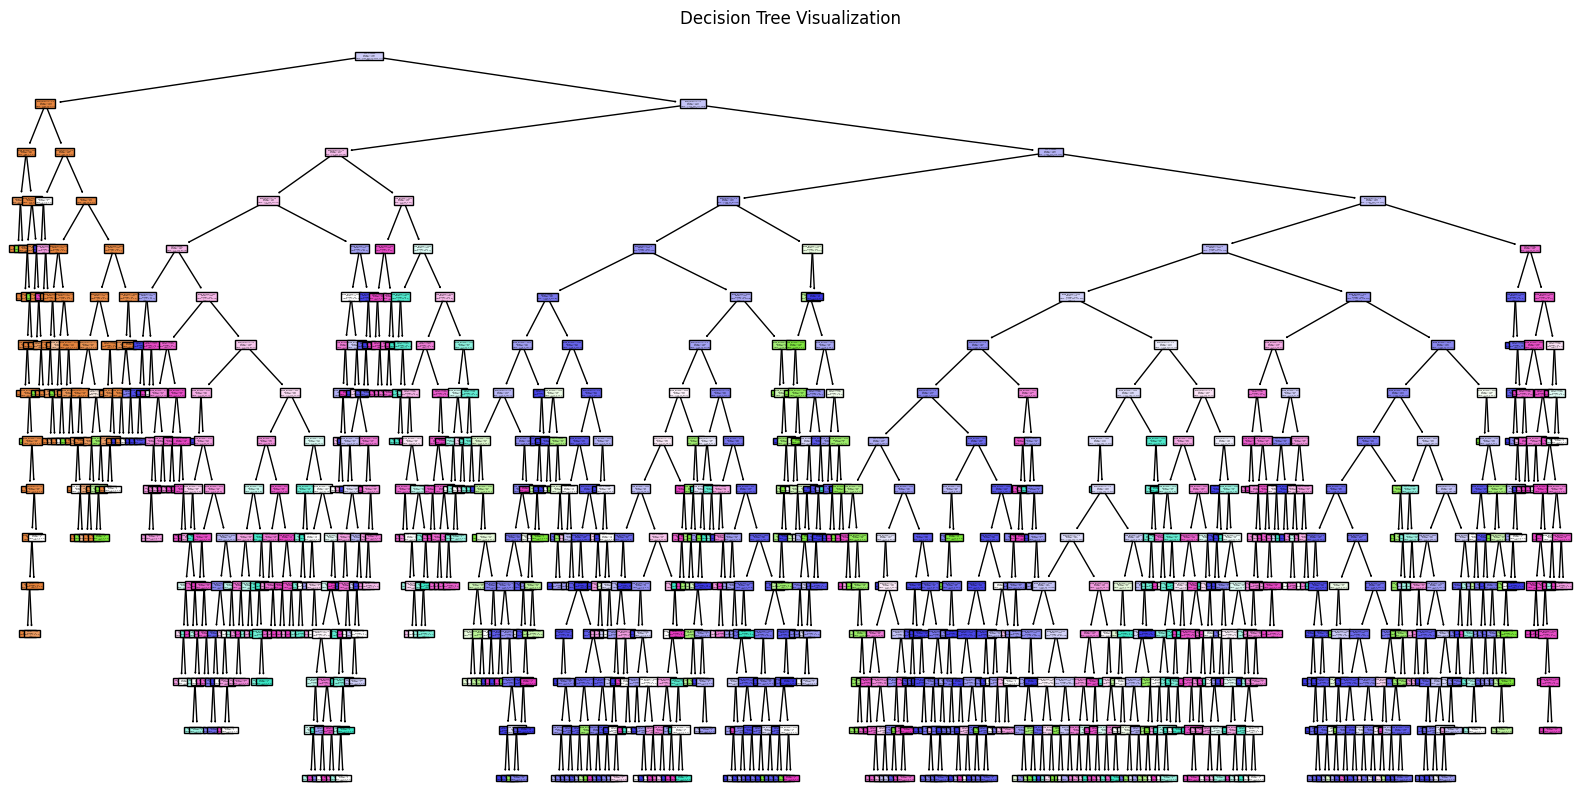

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

class_names_str = [str(cls) for cls in sorted(y.unique())]

# Plotting the decision tree
plt.figure(figsize=(20,10))  # Set the figure size (width, height) in inches
plot_tree(dt_classifier, feature_names=X_train.columns, class_names=class_names_str, filled=True)
plt.title('Decision Tree Visualization')
plt.show()

The overall tree depth that we have chosen for gaining high accuracy is 15.

In decision tree,
- Each split is designed to make the subsets of the data as pure as possible, thereby increasing the overall predictability and effectiveness of the model.
- Appropriate splits can help prevent overfitting. Overfitting occurs when a model is too complex, capturing noise in the data rather than representing the actual relationships between variables. By using techniques like pruning (removing parts of the tree that don’t provide additional power), decision trees can be made more general, enhancing their performance on unseen data.
- The splits made early in the tree, at the top levels, usually involve features that have the most significant impact on the output variable. These features are considered more important for prediction. The decision tree implicitly performs feature selection by prioritizing splits based on the most informative features.




## Task 3c

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
# Determine the effective alphas and the corresponding total leaf impurities
path = dt_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Filter out non-positive alphas
ccp_alphas = ccp_alphas[ccp_alphas > 0]

# Train decision trees using the effective alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Find the optimal alpha by using cross-validation
alpha_scores = [cross_val_score(clf, X_train, y_train, cv=5).mean() for clf in clfs]

# Select the classifier with the best alpha
best_alpha_index = np.argmax(alpha_scores)
best_alpha = ccp_alphas[best_alpha_index]
best_clf = clfs[best_alpha_index]

print(f"Best alpha: {best_alpha}")
print(f"Cross-validation score with best alpha: {alpha_scores[best_alpha_index]}")

# Evaluate the final model on the test set
test_score = best_clf.score(X_test, y_test)
print(f"Test score with best alpha: {test_score}")

# # If needed, you can visualize the pruned tree
# from sklearn.tree import export_text
tree_rules = export_text(best_clf, feature_names=list(X.columns))
print(tree_rules)


Best alpha: 0.0006490200713180436
Cross-validation score with best alpha: 0.7841337704149345
Test score with best alpha: 0.775879917184265
|--- Year <= 2000.50
|   |--- Make_encoded <= 17.50
|   |   |--- Model_encoded <= 46.50
|   |   |   |--- Model_encoded <= 26.50
|   |   |   |   |--- class: 0
|   |   |   |--- Model_encoded >  26.50
|   |   |   |   |--- class: 1
|   |   |--- Model_encoded >  46.50
|   |   |   |--- Model_encoded <= 623.00
|   |   |   |   |--- Year <= 1998.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Year >  1998.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Model_encoded >  623.00
|   |   |   |   |--- class: 0
|   |--- Make_encoded >  17.50
|   |   |--- Make_encoded <= 18.50
|   |   |   |--- class: 3
|   |   |--- Make_encoded >  18.50
|   |   |   |--- Year <= 1996.50
|   |   |   |   |--- Make_encoded <= 28.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Make_encoded >  28.50
|   |   |   |   |   |--- Make_encoded <= 29.50
|   |   |   |   

In [ ]:
y_pred=best_clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.775879917184265


In [ ]:
tree_depth=best_clf.get_depth()
print(f"The depth of the decision tree using the cost pruning method is {tree_depth}")

The depth of the decision tree using the cost pruning method is 15


Trade off's between tree complexity and model performance

1. **Bias-Variance Trade-off**:
Bias: Refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. High bias can cause underfitting.
Variance: Refers to the error introduced by the model's sensitivity to small fluctuations in the training set. High variance can cause overfitting.
A model’s performance can be seen as a balance between bias and variance:

- High Complexity (Deeper Trees): Low bias, high variance. The model fits the training data very well but may not perform well on new data due to overfitting.
Low Complexity (Shallower Trees): High bias, low variance. The model is simpler and may miss significant patterns in the data, leading to underfitting.


2. **Generalization**:
Generalization refers to the model's ability to perform well on new, unseen data. A model that generalizes well strikes a good balance between underfitting and overfitting.
Validation and Cross-Validation: Techniques such as k-fold cross-validation help in estimating the model’s generalization performance and in choosing the right complexity.

3. **Interpretability**:
Complex Trees: Harder to interpret due to a large number of nodes and splits. Each decision path can be complex and less intuitive.
Simple Trees: Easier to interpret and understand. They provide clear and straightforward decision rules that can be easily communicated and understood by stakeholders.

## Task 4a

In [ ]:
# Importing the dataset
import pandas as pd
import numpy as np
path = "/content/drive/MyDrive/data.csv"
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Creating the DataFrame and apllying a base level preprocessing.
df=pd.read_csv(path)

df.convert_dtypes()

df=df.drop_duplicates()

# dropping the Market Category Column as it has many missing values and does not give meaningful insights to predict the taget variable
df = df.drop(columns=['Market Category'],axis=1,inplace=False)

# Filling the value of Engine HP with '0' as the all have the Engine Fuel Type of Electric.
df['Engine HP']=df['Engine HP'].fillna(0)

# Filling the NaN values with '0' in the Engine Cylinder column as all have the Fuel Type of Electric
df['Engine Cylinders']=df['Engine Cylinders'].fillna(0)

#Filling the Engine Fuel Type with the mode of the column
df['Engine Fuel Type']=df['Engine Fuel Type'].fillna('regular unleaded')

# Filling the Number of Doors with the mean of the column
df['Number of Doors']=df['Number of Doors'].fillna(df['Number of Doors'].mean())


# removing the rows which have the values of 'UNKNOWN' for the Transmission Type

df = df.drop(df[df['Transmission Type']=='UNKNOWN'].index, axis='index',inplace=False)

continuous_columns=df.describe(include=['number']).round(2).columns
# Finding the number of outliers in the dataset
for column in continuous_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3-Q1


# the columns that we think we should remove the outliers are highway MPG, city MPG, MSRP, Engine HP and Cylinders

outlier_columns=['highway MPG','city mpg','MSRP','Engine HP','Engine Cylinders']


for i in outlier_columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)

  IQR = Q3-Q1
  outliers_df=[]
  outliers_df = df[(df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))]
  print(f"Num of outliers for the column {i}: ", len(outliers_df))
  df = df.drop(outliers_df.index, axis='index',inplace=False)



# New bins and labels
bins = [1000 ,5000, 20000, 35000, 50000, 80000]
labels = ['Cheap Cars','Economy Cars', 'Mid-Range Cars', 'Upper Mid-Range Cars', 'Luxury Cars']
df['MSRP_Category'] = pd.cut(df['MSRP'], bins=bins, labels=labels)

df_lr = df

Num of outliers for the column highway MPG:  182
Num of outliers for the column city mpg:  130
Num of outliers for the column MSRP:  929
Num of outliers for the column Engine HP:  50
Num of outliers for the column Engine Cylinders:  29


In [ ]:
# importing the label encoder from the sklearn library
from sklearn.preprocessing import LabelEncoder
selectedColumns = list(('Make', 'Model'))
# Initialize LabelEncoder
labels = LabelEncoder()
# Applying LabelEncoder to the selected columns having the categorical feature set
for column in selectedColumns:
  df_lr[column + '_encoded'] = labels.fit_transform(df_lr[column])
df_lr = df_lr.drop(columns=selectedColumns,axis=1,inplace=False)


In [ ]:
#  Binning the Msrp for the classification in categories
df_lr['MSRP_Category'] = pd.cut(df_lr['MSRP'], bins=[1000 ,5000, 20000, 35000, 50000, 80000], labels=['Cheap Cars','Economy Cars', 'Mid-Range Cars', 'Upper Mid-Range Cars', 'Luxury Cars'])
df_lr = df_lr.drop(columns=['MSRP'],axis=1,inplace=False)

'''
importing the ordinal encoder to apply on the target variable
Here the bins are having the relation with the MSRP Category which is again related target variable
Hence due to the relative nature and the hierarchy in the MSRP Category we are using the ordinal encoder.

'''
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_lr['MSRP_Category_encoded'] = ordinal_encoder.fit_transform(df[['MSRP_Category']])
df_lr = df_lr.drop(columns=['MSRP_Category'],axis=1,inplace=False)

In [ ]:
df_lr.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Make_encoded,Model_encoded,MSRP_Category_encoded
count,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000,9867.000000
mean,2010.353299,231.845748,5.430729,3.507854,26.316206,19.194487,1562.374987,17.893179,377.223269,2.532887
std,7.452739,79.231435,1.398480,0.840283,5.763248,4.401751,1463.044863,11.613651,223.502716,1.313671
min,1990.000000,0.000000,3.000000,2.000000,12.000000,10.000000,21.000000,0.000000,0.000000,0.000000
25%,2006.000000,170.000000,4.000000,3.000000,22.000000,16.000000,549.000000,8.000000,175.000000,2.000000
50%,2015.000000,220.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,15.000000,374.000000,3.000000
75%,2016.000000,288.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,28.000000,598.000000,3.000000
max,2017.000000,469.000000,8.000000,4.000000,42.000000,32.000000,5657.000000,37.000000,749.000000,4.000000


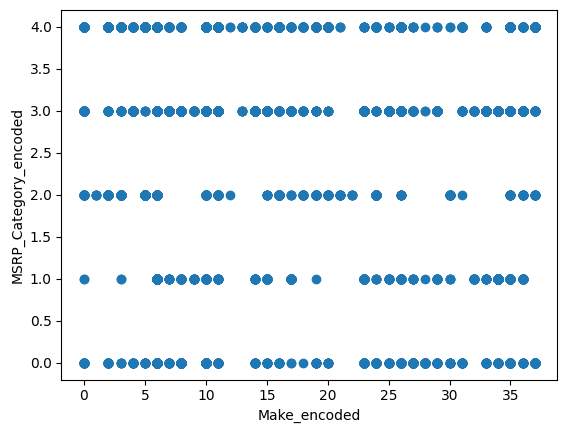

<Axes: xlabel='MSRP_Category_encoded', ylabel='Count'>

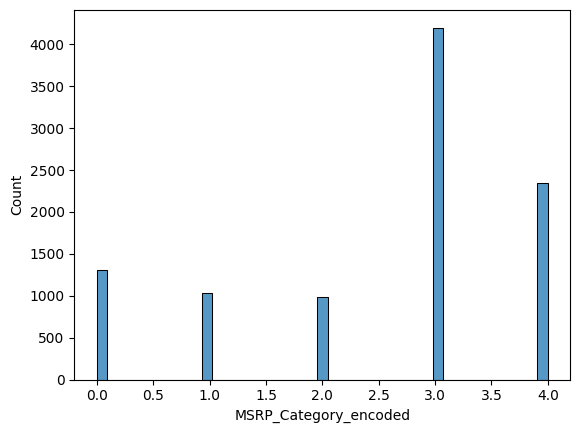

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.scatter(df['Make_encoded'],df['MSRP_Category_encoded'])
plt.xlabel('Make_encoded')
plt.ylabel('MSRP_Category_encoded')
plt.show()
sns.histplot(df['MSRP_Category_encoded'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Selecting the featureset to train the model on
selected_columns = ['Year','Make_encoded','Model_encoded','MSRP_Category_encoded']
df_lr=df_lr[selected_columns]
X = df_lr.iloc[:,:-1]
y = df_lr['MSRP_Category_encoded']
# Applying the Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=30)
model = LogisticRegression(solver='lbfgs', max_iter=250)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f'\nAccuracy of the logistic regression model is: {(accuracy*100):.2f}%')


Accuracy of the logistic regression model is: 43.77%


Logistic Regression Derivation

Odds and Log-Odds:
    The odds of an event occurring (e.g., y=1y=1) is given by:

$$Odds(y=1)=P(y=1)P(y=0)
Odds(y=1)=P(y=0)P(y=1)$$​

    The log-odds (logit) is the natural logarithm of the odds:

$$Log-Odds(y=1)=log⁡(P(y=1)P(y=0))
Log-Odds(y=1)=log(P(y=0)P(y=1)​)$$

Linear Combination:
In logistic regression, the log-odds is modeled as a linear combination of the input features:
$$Log-Odds(y=1)=β0+β1X1+β2X2+⋯+βnXn
Log-Odds(y=1)=β0​+β1​X1​+β2​X2​+⋯+βn​Xn​ $$

    Here, β0β0​ is the intercept and β1,β2,…,βnβ1​,β2​,…,βn​ are the coefficients of the features X1,X2,…,XnX1​,X2​,…,Xn​.

Probability Transformation:
The logistic function (sigmoid function) is used to transform the

log-odds to a probability:

$$P(y=1)=11+e−Log-Odds(y=1)
P(y=1)=1+e−Log-Odds(y=1)1​$$

Substituting the linear combination:

$$P(y=1)=11+e−(β0+β1X1+β2X2+⋯+βnXn)
P(y=1)=1+e−(β0​+β1​X1​+β2​X2​+⋯+βn​Xn​)1​$$

## Task 4b

In [ ]:
# Performing a T-test on the logistic regression co-efficient
# Firstly importing the statsmodel library for performing the statistical functions of the t-test
import statsmodels.api as sm

'''As we have 5 Labels in our target feature but the T-test only performs on the Binary Variable
Hence we Convert our feature variable to binary labels'''

y_train_binary = (y_train == 2).astype(int)
y_train_binary = y_train_binary.ravel()

# Add a constant to the features (for the intercept)
X_train_sm = sm.add_constant(X_train)

# Fiting the model using statsmodels to get detailed output
logit_model = sm.Logit(y_train_binary, X_train_sm)
result = logit_model.fit()

# Extracting the coefficients and standard errors
coefficients_sm = result.params
standard_errors = result.bse

# Calculate t-values and p-values
t_values = coefficients_sm / standard_errors
p_values = result.pvalues

# Displaying the values
print("Coefficients from statsmodels:\n", coefficients_sm)
print("\nStandard Errors:\n", standard_errors)
print("\nT-values:\n", t_values)
print("\nP-values:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.287811
         Iterations 9
Coefficients from statsmodels:
 const           -353.247575
Year               0.174691
Make_encoded      -0.047743
Model_encoded      0.000366
dtype: float64

Standard Errors:
 const            23.104777
Year              0.011467
Make_encoded      0.003781
Model_encoded     0.000172
dtype: float64

T-values:
 const           -15.288941
Year             15.233645
Make_encoded    -12.627794
Model_encoded     2.129593
dtype: float64

P-values:
 const            9.061164e-53
Year             2.114647e-52
Make_encoded     1.483807e-36
Model_encoded    3.320521e-02
dtype: float64


**Analysis of the findings from the T-test**

* Intercept (const): At a p-value of 9.06e-53, the intercept shows a very significant negative coefficient. This shows that the dependent variable's base level (before taking into account any features) differs significantly from zero while all other characteristics are held constant.

* Year: The coefficient is 0.17, t-value is 15.23, and p-value is 2.11e-52 for Year. Year significantly improves the model, as seen by the extremely low p-value. The target variable's log-odds rise with an increase in Year. This implies that the target variable may be positively correlated with newer automobiles.

* Make_encoded: The Make_encoded feature has a p-value of 1.48e-36, a t-value of -12.63, and a negative coefficient of -0.05. It is possible that Make_encoded is likewise very significant based on this extremely low p-value. Higher values of Make_encoded are linked to a decline in the target variable's log-odds, according to the negative coefficient.

* Model_encoded: With a t-value of 2.13 and a p-value of 0.0332, the coefficient for Model_encoded is 0.0004. Despite having a very little effect size, Model_encoded has a statistically significant positive impact on the model, as indicated by the p-value, which is below the conventional significance level of 0.05.

**Conclusion**

* To summarize up, the attributes Year, Make_encoded, and Model_encoded have a big influence on the model:
 * Newer cars are likely to have higher values of the target variable since year has a strong positive impact. Different car manufactures can considerably lower the log-odds of the target variable, as indicated by the significant negative influence of Make_encoded. Additionally, model_encoded has a very little but significant positive impact, indicating that some model encodings may slightly boost the log-odds.


**Explanation of the Terminology Used in the context of the T-test**

Odds

The odds of an event are defined as the probability that the event occurs divided by the probability that the event does not occur. For a binary target variable yy with two possible outcomes (e.g., success/failure, yes/no, 1/0), the odds are given by:

$$Odds=P(y=1)P(y=0)Odds=P(y=0)P(y=1)​$$

Log-Odds

The log-odds (logit) is simply the natural logarithm of the odds:

$$Log-Odds=log⁡(P(y=1)P(y=0))Log-Odds=log(P(y=0)P(y=1)​)$$

Logistic Regression and Log-Odds

In logistic regression, we model the log-odds of the probability of the binary outcome as a linear combination of the input features. The model can be expressed as:

$$Log-Odds=β0+β1⋅X1+β2⋅X2+⋯+βn⋅XnLog-Odds=β0​+β1​⋅X1​+β2​⋅X2​+⋯+βn​⋅Xn​$$

where:

    β0β0​ is the intercept term.
    β1,β2,…,βnβ1​,β2​,…,βn​ are the coefficients of the input features X1,X2,…,XnX1​,X2​,…,Xn​.

Interpretation of Coefficients in Terms of Log-Odds

Each coefficient in the logistic regression model represents the change in the log-odds of the outcome for a one-unit increase in the corresponding feature, holding all other features constant.

A positive coefficient means that as the feature value increases, the log-odds of the outcome occurring (i.e., y=1y=1) increases.
A negative coefficient means that as the feature value increases, the log-odds of the outcome occurring decreases.

To convert log-odds back to probability, we can use the following formula:

$$P(y=1)=eLog-Odds1+eLog-OddsP(y=1)=1+eLog-OddseLog-Odds​$$

This formula helps in interpreting the model's predictions in terms of probabilities.




    

The t-test formula for evaluating the significance of each coefficient in a regression model is given by the ratio of the coefficient estimate to its standard error. The formula is as follows:

$$[
t = \frac{\beta_i}{\text{SE}(\beta_i)}
]$$
where:

    tt is the t-value.
    βiβi​ is the coefficient estimate for the ii-th predictor.
    SE(βi)SE(βi​) is the standard error of the coefficient estimate for the ii-th predictor.






## Task 4c

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
y_prob = model.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auclr = roc_auc_score(y_test,y_prob, multi_class='ovr')
print(f"ROC-AUC Score for Logistic Regression: {roc_auclr:.2f}")

y_prob_tree = dt_classifier.predict_proba(X_test)
roc_auc_tree = roc_auc_score(y_test, y_prob_tree, multi_class='ovr')
print(f"ROC-AUC Score for Decision Tree: {roc_auc_tree:.2f}")
print(f"The difference in the ROC-AUC Score for the Decision tree and the Logistic Regresiion is: {(roc_auc_tree-roc_auclr)*100:.2f}%")

ROC-AUC Score for Logistic Regression: 0.57
ROC-AUC Score for Decision Tree: 0.94
The difference in the ROC-AUC Score for the Decision tree and the Logistic Regresiion is: 36.78%


ROC-AUC Explaination and the Logical Working and it's uses in the classification models comparison.

* ROC Curve:
The Receiver Operating Characteristic (ROC) curve is a graphical representation of a classifier's performance across various threshold values. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR).
___
True Positive Rate (TPR), also known as sensitivity or recall, is defined as:

$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$


where TP is the number of true positives and FN is the number of false negatives.

False Positive Rate (FPR) is defined as:

$$
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
$$


where FP is the number of false positives and TN is the number of true negatives.
___
AUC (Area Under the Curve):
  * The Area Under the ROC Curve (ROC-AUC) is a single scalar value that summarizes the performance of the classifier. It represents the probability that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.
  Evaluating Model Performance


Output Analysis:

* Comparing the performance of the logistic regression model and the decision tree model using the ROC-AUC scores from the provided output

  **Logistic Regression:**

  $$ROC__AUC Score for Logistic Regression=0.57$$

  **Decision Tree:**

  $$ROC___AUC Score for Decision Tree=0.94$$

  **Difference:**

  $$Difference=(0.94−0.57)×100=36.78\%$$


___
Interpretation

* The ROC-AUC score for the decision tree (0.94) is significantly higher than that for the logistic regression model (0.57). Here’s what this means:

* Performance:
  Decision Tree: With an ROC-AUC score of 0.94, the decision tree model has excellent performance, indicating it can distinguish between the classes with high accuracy.
  Logistic Regression: The ROC-AUC score of 0.57 for the logistic regression model indicates poor performance, only slightly better than random guessing (which would score 0.50).

* Difference in ROC-AUC:
  The difference of **36.78%** indicates a substantial gap in the classification performance between the two models. The decision tree model is significantly better at distinguishing between the positive and negative classes compared to the logistic regression model.
___
Evaluation Metrics and Interpretability

* ROC-AUC:
  * The decision tree's higher ROC-AUC score demonstrates its superior capability in distinguishing between classes.

* Precision-Recall Curves:
  * While the ROC-AUC provides a good measure of overall performance, the precision-recall curve is particularly useful when dealing with imbalanced datasets. Precision-recall curves can give better insight into the performance for the minority class.
___
Interoperability

* Logistic Regression:
  Interpretability: Logistic regression models are highly interpretable. Each coefficient represents the log-odds change in the dependent variable for a one-unit change in the predictor variable, holding other variables constant.
  Simplicity: The simplicity and linear nature of logistic regression make it easier to understand and communicate results.

* Decision Tree:
  Interpretability: Decision trees provide a visual representation of the decision-making process, making them intuitive to understand. Each path from root to leaf represents a classification rule.
  Complexity: Decision trees can become complex and overfit the data, especially if not pruned properly. This complexity can sometimes make the model less interpretable compared to logistic regression.
___
Conclusion

* The decision tree model outperforms the logistic regression model significantly in terms of ROC-AUC score, indicating better classification performance. Whereas, the Logistic Regression offers better interpretability and simplicity.

## Task 5a

**Hinge Loss**

$${Hinge Loss Function}$$

The hinge loss is a popular loss function used primarily with Support Vector Machines (SVMs) for binary classification tasks. It is defined mathematically as follows:

$$
L(y, f(x)) = \max(0, 1 - y \cdot f(x))
$$



  
The hinge loss penalizes predictions that are either wrong or are not confidently right. Specifically, the loss is zero if $$ y \cdot f(x) \geq 1$$, meaning the prediction is not only correct but also exceeds the margin of confidence. If $$ y \cdot f(x) < 1 $$, the function linearly increases the loss, encouraging correct and confident predictions.




In [ ]:
import pandas as pd
import numpy as np
path = "/content/drive/MyDrive/data.csv"
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv(path)
df.convert_dtypes()

df=df.drop_duplicates()

# dropping the Market Category Column as it has many missing values and does not give meaningful insights to predict the taget variable
df.drop(columns=['Market Category'],axis=1,inplace=True)

# Filling the value of Engine HP with '0' as the all have the Engine Fuel Type of Electric.
df['Engine HP']=df['Engine HP'].fillna(0)

# Filling the NaN values with '0' in the Engine Cylinder column as all have the Fuel Type of Electric
df['Engine Cylinders']=df['Engine Cylinders'].fillna(0)

#Filling the Engine Fuel Type with the mode of the column
df['Engine Fuel Type']=df['Engine Fuel Type'].fillna('regular unleaded')

# Filling the Number of Doors with the mean of the column
df['Number of Doors']=df['Number of Doors'].fillna(df['Number of Doors'].mean())


# removing the rows which have the values of 'UNKNOWN' for the Transmission Type

df.drop(df[df['Transmission Type']=='UNKNOWN'].index, axis='index',inplace=True)


# Finding the number of outliers in the dataset
for column in continuous_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3-Q1


# the columns that we think we should remove the outliers are highway MPG, city MPG, MSRP, Engine HP and Cylinders

outlier_columns=['highway MPG','city mpg','MSRP','Engine HP','Engine Cylinders']


for i in outlier_columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)

  IQR = Q3-Q1
  outliers_df=[]
  outliers_df = df[(df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))]
  print(f"Num of outliers for the column {i}: ", len(outliers_df))
  df.drop(outliers_df.index, axis='index',inplace=True)



# New bins and labels
bins = [1000 ,5000, 20000, 35000, 50000, 80000]
labels = ['Cheap Cars','Economy Cars', 'Mid-Range Cars', 'Upper Mid-Range Cars', 'Luxury Cars']
df['MSRP_Category'] = pd.cut(df['MSRP'], bins=bins, labels=labels)


df_svm=df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Num of outliers for the column highway MPG:  182
Num of outliers for the column city mpg:  130
Num of outliers for the column MSRP:  929
Num of outliers for the column Engine HP:  50
Num of outliers for the column Engine Cylinders:  29


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a list of columns to be label encoded
columns_to_encode = ['Make', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style', 'MSRP_Category']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column and save the encoded values back to the dataframe
for column in columns_to_encode:
    df_svm[column + ' Encoded'] = label_encoder.fit_transform(df_svm[column])

# Drop the original columns if not needed
df_svm.drop(columns=columns_to_encode, inplace=True)
df_svm.drop(columns=['MSRP'],inplace=True)

# Display the first few rows to check the result
df_svm.head()


,Model,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Make Encoded,Engine Fuel Type Encoded,Transmission Type Encoded,Driven_Wheels Encoded,Vehicle Size Encoded,Vehicle Style Encoded,MSRP_Category Encoded
0,1 Series M,2011,335.0,6.0,2.0,26,19,3916,3,7,2,3,0,8,4
1,1 Series,2011,300.0,6.0,2.0,28,19,3916,3,7,2,3,0,6,4
2,1 Series,2011,300.0,6.0,2.0,28,20,3916,3,7,2,3,0,8,4
3,1 Series,2011,230.0,6.0,2.0,28,18,3916,3,7,2,3,0,8,3
4,1 Series,2011,230.0,6.0,2.0,28,18,3916,3,7,2,3,0,6,3


In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import category_encoders as ce

# Apply Target Encoding to the 'Model' column
target_encoder = ce.TargetEncoder()
df_svm['Model'] = target_encoder.fit_transform(df_svm['Model'], df_svm['MSRP_Category Encoded'])

# Prepare features and target variable
X = df_svm.drop(['MSRP_Category Encoded'], axis=1)
y = df_svm['MSRP_Category Encoded']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=svm_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

In [ ]:
print(accuracy)

0.5020263424518744


## Task 5b

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model
svm_model = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 0.5,1.0],  # Example values, should be adjusted based on the specific needs and scale of your data
    'kernel': ['linear']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_svm = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated score: {:.2f}".formait(grid_search.best_score_))

# Evaluate on the test set
y_pred = best_svm.predict(X_test)
print(accuracy(y_test,y_pred))
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model
svm_model = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 0.5,1.0],  # Example values, should be adjusted based on the specific needs and scale of your data
    'kernel': ['poly']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_svm = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated score: {:.2f}".formait(grid_search.best_score_))

# Evaluate on the test set
y_pred = best_svm.predict(X_test)
print(accuracy(y_test,y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model
svm_model = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 0.5,1.0],  # Example values, should be adjusted based on the specific needs and scale of your data
    'kernel': ['RBF']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_svm = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated score: {:.2f}".formait(grid_search.best_score_))

# Evaluate on the test set
y_pred = best_svm.predict(X_test)
print(accuracy(y_test,y_pred))
print(classification_report(y_test, y_pred))


**Impact of these hyperparameters on model performance**

**C (Regularization Parameter):**

Impact: The regularization parameter C in SVM serves as a trade-off between achieving a low training error and maintaining a low model complexity for better generalization. A higher value of 𝐶 tries to classify all training examples correctly (highpenalty on misclassified points), which can lead tooverfitting if the data is noisy. A lower C allows moreslack for misclassification, increasing the margin but potentially underfitting the model.

**Kernel Types:**

**RBF (Radial Basis Function) Kernel**:

Impact: The RBF kernel is useful for handling cases where the relationship between class labels and attributes is nonlinear. It can map samples into a higher dimensional space, thus making it possible to handle scenarios where data points are not linearly separable. The key hyperparameter in RBF is gamma (𝛾), which defines how far the influence of a single training example reaches. High
(𝛾)  values lead to models that capture the noise in data (overfit), while low values result in models that cannot capture the complexity of the data (underfit).

**Polynomial (Poly) Kernel:**

Impact: This kernel raises the data to a specific power as defined by the kernel degree and thus can capture more complex structures in the data. The degree of the polynomial is a crucial hyperparameter: higher degrees can lead to models that are highly sensitive to noise in the training data. Polynomial kernels are typically more computationally intensive than linear kernels.

**Linear Kernel**:

Impact: This is the simplest form of kernel, generally used when the data is linearly separable. Using a linear kernel allows the SVM to be trained more quickly and is less complex, making it easier to interpret. There are no additional parameters to tune (apart from 𝐶 ), which makes it a good starting model to try before moving to more complex kernels.

## Task 5c

**Based on performance**

**SVM**

- Advantages

 - SVMs are highly effective in high dimensional spaces. They are particularly effective when the number of dimensions exceed the number of samples. Also, they have the feature of choosing between kernels which can help us to improve the performance on the dataset.

- Disadvantages

 - SVMs are are inefficient and slow and also take a lot of time to get trained.


**Decision Trees**

- Advantages

 - They handle both categorical and numerical data and also handle non-linear relationships. Also, decision tree are non-parametric which means that they do not have to assume anything about the distribution of the data.

- Disadvantages

 - They can easily overfit, especially with many features and deep trees. They can also be unstable because small variations in data might result in a completely different tree being generated.

**Logistic Regression**

- Advantages

 - It performs well when there is a linear decision boundary. It’s also less prone to overfitting, especially if regularization is used.

- Disadvantges

 - It assumes a linear relationship between the independent variables and the logarithm of odds of the dependent variable, which might not hold in more complex and non-linear situations like the ones possibly present in  dataset.

**Computational Complexity**

**SVM**

**Complexity**: High, especially with kernel-based methods, as they involve computing the distances between all pairs of data points in high-dimensional space.

**Decision Trees**

**Complexity**: Medium, primarily due to the processes of splitting nodes and pruning the tree. The complexity can increase with the number of features and depth of the tree.


**Logistic Regression**

**Complexity**: Low to Medium, as it typically involves solving a convex optimization problem, which is computationally less expensive than the training processes for SVM and decision trees.


**Interpretability**

**SVM**

**Interpretability: Low, as the decision function, especially with non-linear kernels, can be difficult to understand and interpret in terms of how predictions are made.
Decision Trees
Interpretability: High, as they mimic human decision-making logic and can be visualized as a simple flowchart, which makes the model decisions easy to understand.
Logistic Regression
Interpretability: High, as it provides coefficients for each feature showing the impact of that feature on the probability of the outcome, which can be directly interpreted.
